In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../CSV/salary.csv",index_col=0)

In [6]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
df.describe(include="all")

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,1032.000000,1032,1.032000e+03,1032,1032.000000,1032,1032,1032,1032,1032,1032.00000,1032.000000,1032.000000,1032,1032.000000
unique,NaN,6,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,30,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,766,NaN,338,NaN,472,143,401,886,701,NaN,NaN,NaN,943,NaN
mean,37.954457,NaN,1.918318e+05,NaN,10.221899,NaN,NaN,NaN,NaN,NaN,560.19186,102.870155,40.706395,NaN,0.246124
std,12.825353,NaN,1.074243e+05,NaN,2.501636,NaN,NaN,NaN,NaN,NaN,2406.47961,432.251488,11.736603,NaN,0.430961
min,17.000000,NaN,2.117400e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.155792e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.807065e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,0.000000
75%,46.000000,NaN,2.461932e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,45.000000,NaN,0.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [9]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [13]:
df["Income"].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [9]:
cat_df = df.select_dtypes("object")
num_df = df.select_dtypes("int64")

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in cat_df:
    le = LabelEncoder()
    cat_df[col] = le.fit_transform(cat_df[col])

In [15]:
cat_df.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [22]:
df = pd.concat([cat_df,num_df],axis=1)

In [23]:
df.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,338409,13,0,0,40,0


### EDA

In [24]:
cat_col = ("Workclass,education,marital-status,occupation,relationship,race,sex,native-country").split(",")

In [25]:
cat_col

['Workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

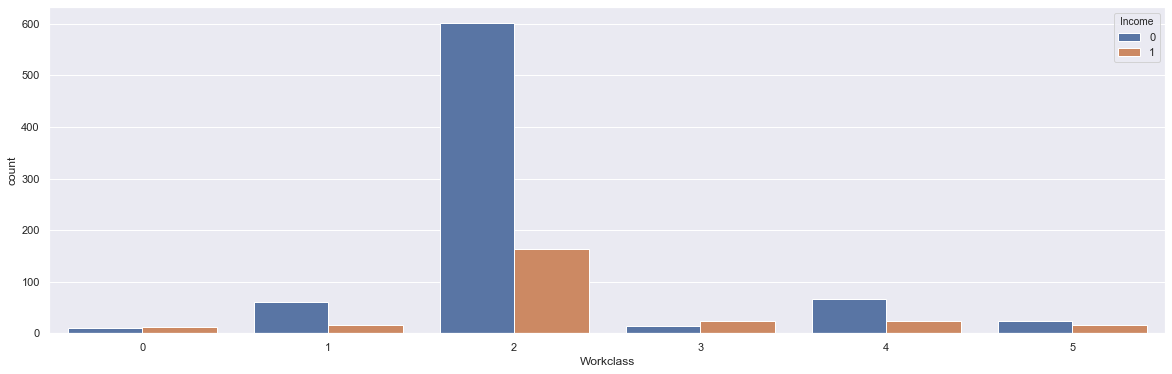

------------------------------------------------------------------------


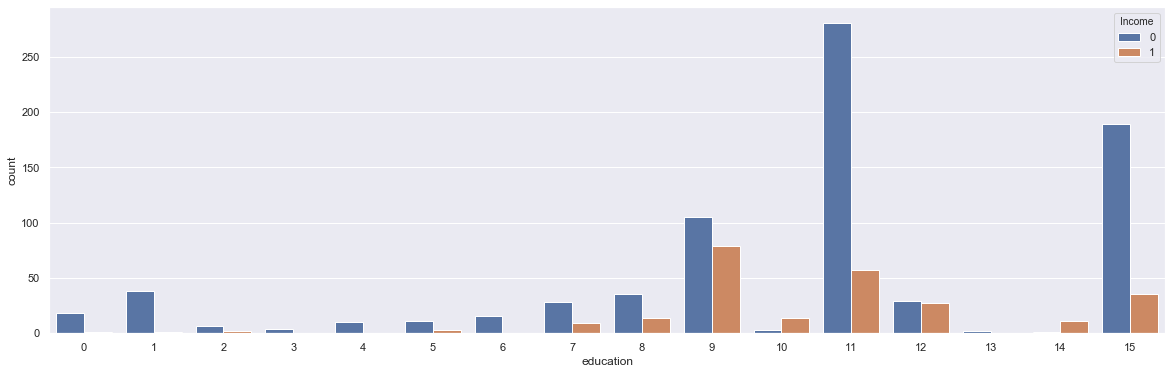

------------------------------------------------------------------------


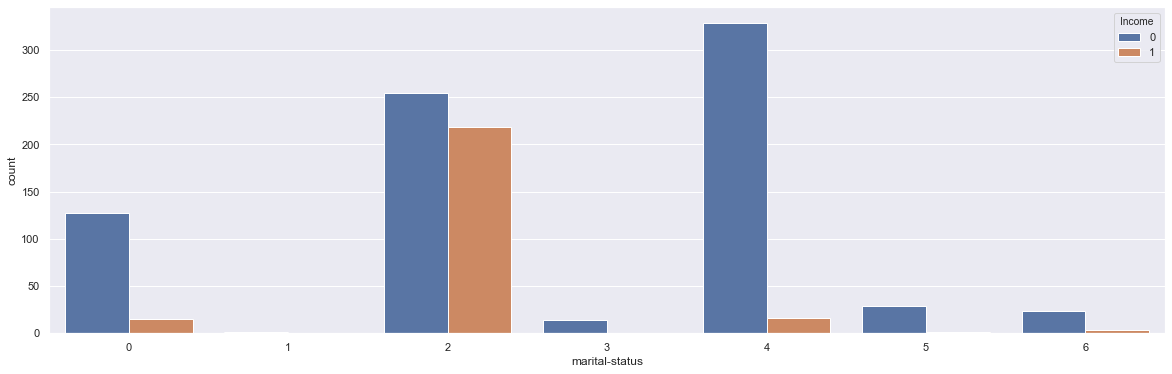

------------------------------------------------------------------------


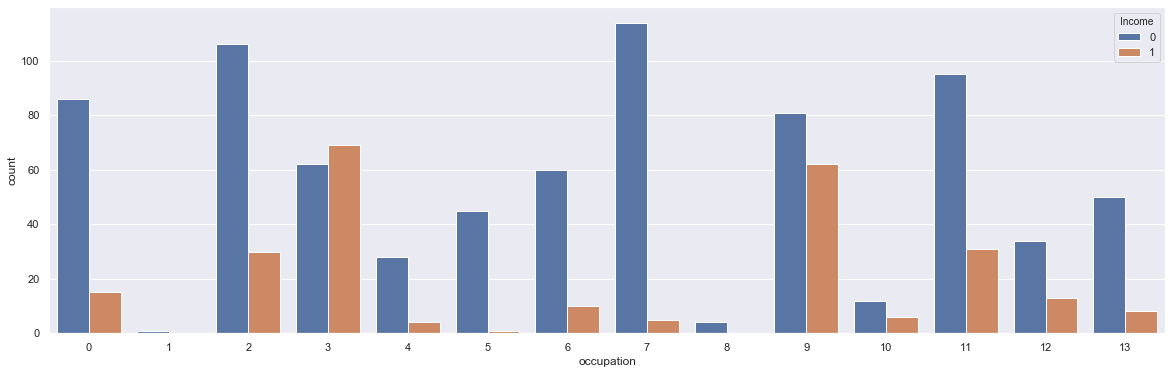

------------------------------------------------------------------------


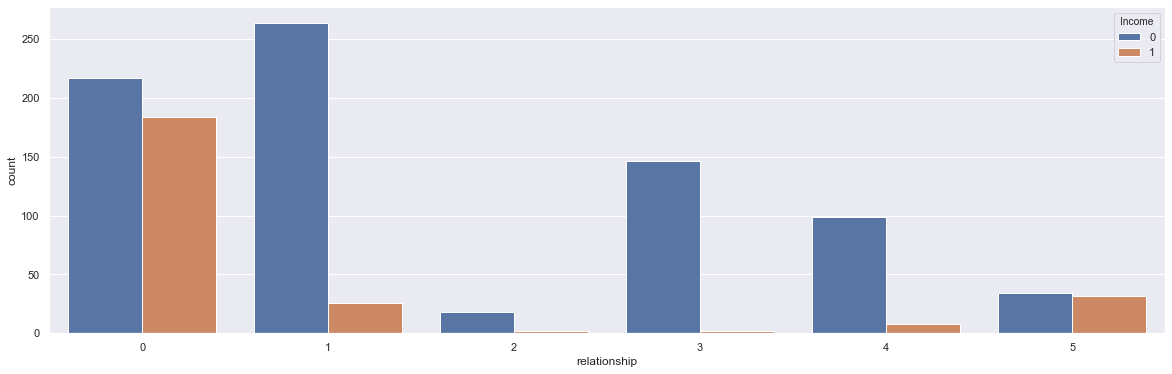

------------------------------------------------------------------------


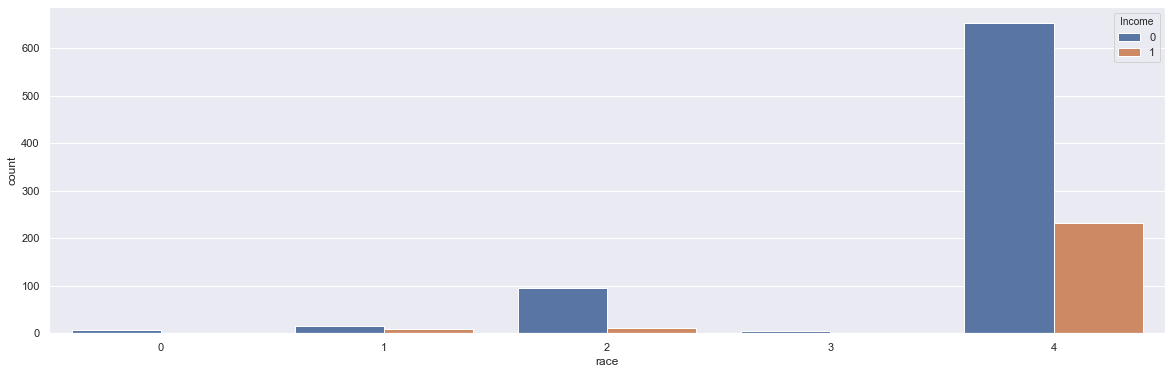

------------------------------------------------------------------------


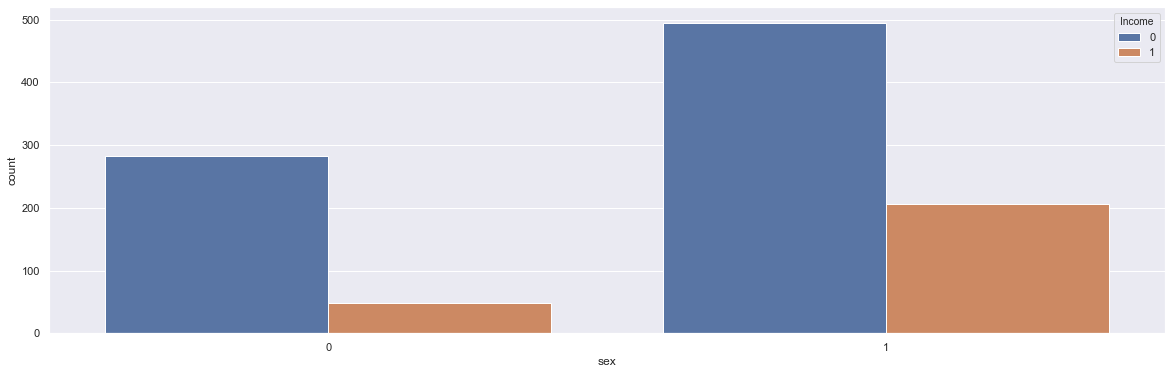

------------------------------------------------------------------------


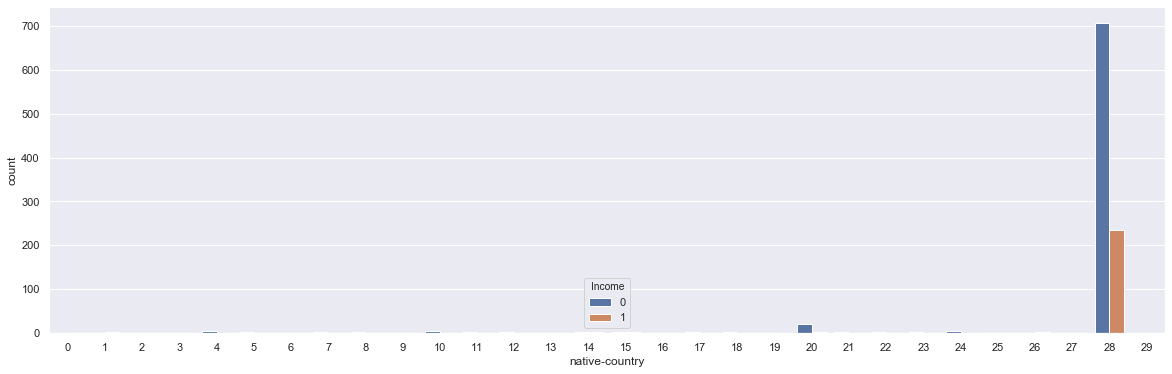

------------------------------------------------------------------------


In [26]:
for col in cat_col:
    plt.figure(figsize=(20,6))
    sns.countplot(data=df,x=col,hue="Income")
    plt.show()
    print("------------------------------------------------------------------------")

In [27]:
num_col = ("age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week").split(",")

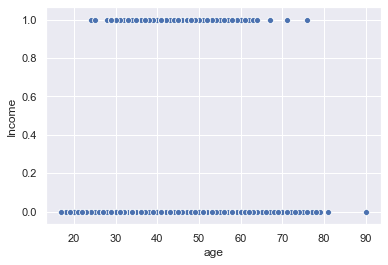

-------------------------------------------------------------------------------


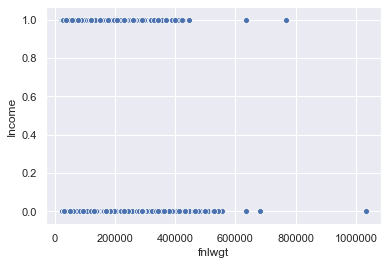

-------------------------------------------------------------------------------


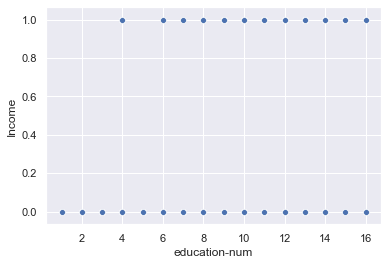

-------------------------------------------------------------------------------


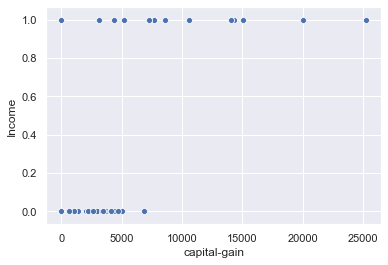

-------------------------------------------------------------------------------


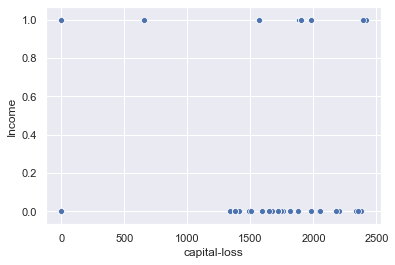

-------------------------------------------------------------------------------


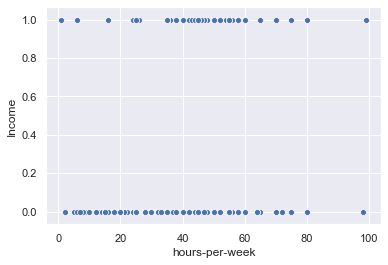

-------------------------------------------------------------------------------


In [28]:
for col in num_col:
    plt.figure()
    sns.scatterplot(data=df,x=col,y="Income")
    plt.show()
    print("-------------------------------------------------------------------------------")

### Train Test Split

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
log  = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
log.score(X_test,y_test)

0.8064516129032258

In [39]:
y_pred = log.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
log.predict_proba(X_test)

array([[0.78289909, 0.21710091],
       [0.85198354, 0.14801646],
       [0.4454658 , 0.5545342 ],
       [0.75771233, 0.24228767],
       [0.83252627, 0.16747373],
       [0.89213857, 0.10786143],
       [0.80077115, 0.19922885],
       [0.78079358, 0.21920642],
       [0.70564887, 0.29435113],
       [0.76828643, 0.23171357],
       [0.82301475, 0.17698525],
       [0.47687899, 0.52312101],
       [0.79644364, 0.20355636],
       [0.80810884, 0.19189116],
       [0.76485285, 0.23514715],
       [0.81625166, 0.18374834],
       [0.91743654, 0.08256346],
       [0.76957656, 0.23042344],
       [0.59393993, 0.40606007],
       [0.88496056, 0.11503944],
       [0.79018846, 0.20981154],
       [0.82464547, 0.17535453],
       [0.73753301, 0.26246699],
       [0.81109899, 0.18890101],
       [0.85457364, 0.14542636],
       [0.73336104, 0.26663896],
       [0.81605334, 0.18394666],
       [0.77512596, 0.22487404],
       [0.79390116, 0.20609884],
       [0.75399091, 0.24600909],
       [0.

### Evaluation metrics

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       238
           1       0.77      0.24      0.36        72

    accuracy                           0.81       310
   macro avg       0.79      0.61      0.62       310
weighted avg       0.80      0.81      0.76       310



In [42]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [43]:
print(tp,fp,"\n",fn,tn)

17 5 
 55 233


In [44]:
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))

Accuracy: 0.8064516129032258
